In [1]:
# import needed modules
!pip install pycoingecko
from pycoingecko import CoinGeckoAPI
import pandas as pd
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Generate timestamp
now = date.today() - timedelta(days=1)
ttm = date.today() - timedelta(days=365)
now.strftime('%Y-%m-%d')
ttm.strftime('%Y-%m-%d')

now_date_string = now.strftime('%Y-%m-%d')
now_date = datetime.strptime(now_date_string, '%Y-%m-%d')
now_timestamp = str(int(datetime.timestamp(now_date)))

TTM_date_string = ttm.strftime('%Y-%m-%d')
TTM_date = datetime.strptime(TTM_date_string, '%Y-%m-%d')
TTM_timestamp = str(int(datetime.timestamp(TTM_date)))

In [3]:
cg = CoinGeckoAPI()

#btc = cg.get_coin_market_chart_range_by_id(id='bitcoin',vs_currency='usd',from_timestamp=TTM_timestamp,to_timestamp=now_timestamp)
#eth = cg.get_coin_market_chart_range_by_id(id='ethereum',vs_currency='usd',from_timestamp=TTM_timestamp,to_timestamp=now_timestamp)

btc_ohlc = cg.get_coin_ohlc_by_id(id='bitcoin',vs_currency='usd', days='180')
df_btc_ohlc = pd.DataFrame.from_records(btc_ohlc)
df_btc_ohlc.columns =['Timestamp','Open','High','Low','Close']
df_btc_ohlc['Token']='Bitcoin'
df_btc_ohlc.set_index('Timestamp',inplace=True)

eth_ohlc = cg.get_coin_ohlc_by_id(id='ethereum',vs_currency='usd', days='180')
df_eth_ohlc = pd.DataFrame.from_records(eth_ohlc)
df_eth_ohlc.columns =['Timestamp','Open','High','Low','Close']
df_eth_ohlc['Token']='Ethereum'
df_eth_ohlc.set_index('Timestamp',inplace=True)

etc_ohlc = cg.get_coin_ohlc_by_id(id='ethereum-classic',vs_currency='usd', days='180')
df_etc_ohlc = pd.DataFrame.from_records(etc_ohlc)
df_etc_ohlc.columns =['Timestamp','Open','High','Low','Close']
df_etc_ohlc['Token']='Ethereum Classic'
df_etc_ohlc.set_index('Timestamp',inplace=True)

bch_ohlc = cg.get_coin_ohlc_by_id(id='bitcoin-cash',vs_currency='usd', days='180')
df_bch_ohlc = pd.DataFrame.from_records(bch_ohlc)
df_bch_ohlc.columns =['Timestamp','Open','High','Low','Close']
df_bch_ohlc['Token']='Bitcoin Cash'
df_bch_ohlc.set_index('Timestamp',inplace=True)

ltc_ohlc = cg.get_coin_ohlc_by_id(id='litecoin',vs_currency='usd', days='180')
df_ltc_ohlc = pd.DataFrame.from_records(ltc_ohlc)
df_ltc_ohlc.columns =['Timestamp','Open','High','Low','Close']
df_ltc_ohlc['Token']='Litecoin'
df_ltc_ohlc.set_index('Timestamp',inplace=True)

In [4]:
#Create price series
price_series = pd.concat([df_btc_ohlc, df_eth_ohlc, df_etc_ohlc, df_bch_ohlc, df_ltc_ohlc], ignore_index=False, sort=False)
price_series = price_series.reset_index()
price_series = price_series[['Timestamp', 'Close', 'Token']]
price_series['Timestamp'] = pd.to_datetime(price_series['Timestamp'], unit = 'ms')
price_series = price_series.set_index('Timestamp')
price_series_pivot = price_series.pivot(columns='Token', values='Close')


In [5]:
# calculate daily returns
returns_daily = price_series_pivot.pct_change()
btc_returns = returns_daily['Bitcoin']
eth_returns = returns_daily['Ethereum']
bch_returns = returns_daily['Bitcoin Cash']
etc_returns = returns_daily['Ethereum Classic']
ltc_returns = returns_daily['Litecoin']

Text(0.5, 1.0, '30 Day Bitcoin Correlation')

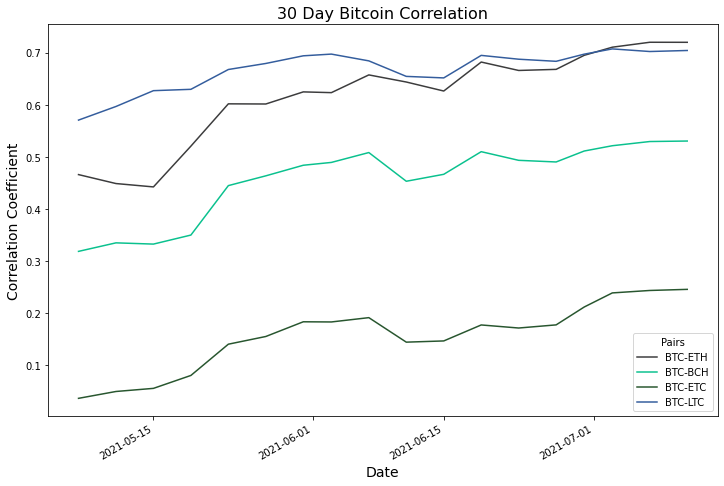

In [6]:
#calculate & plot correlation
period = 30
btc_eth_corrs = btc_returns.rolling(period).corr(other=eth_returns).dropna()
btc_etc_corrs = btc_returns.rolling(period).corr(other=etc_returns).dropna()
btc_bch_corrs = btc_returns.rolling(period).corr(other=bch_returns).dropna()
ltc_btc_corrs = btc_returns.rolling(period).corr(other=ltc_returns).dropna()


btc_eth_corrs.plot(figsize=(12,8), label='BTC-ETH', color='#3c3c3d')
btc_bch_corrs.plot(figsize=(12,8), label='BTC-BCH', color='#0AC18E')
btc_etc_corrs.plot(figsize=(12,8), label='BTC-ETC', color='#28562F')
ltc_btc_corrs.plot(figsize=(12,8), label='BTC-LTC', color='#345D9D')


#add legend
plt.legend(title='Pairs')

#add axes labels and a title
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('30 Day Bitcoin Correlation', fontsize=16)



Text(0.5, 1.0, '7 Day Bitcoin Correlation')

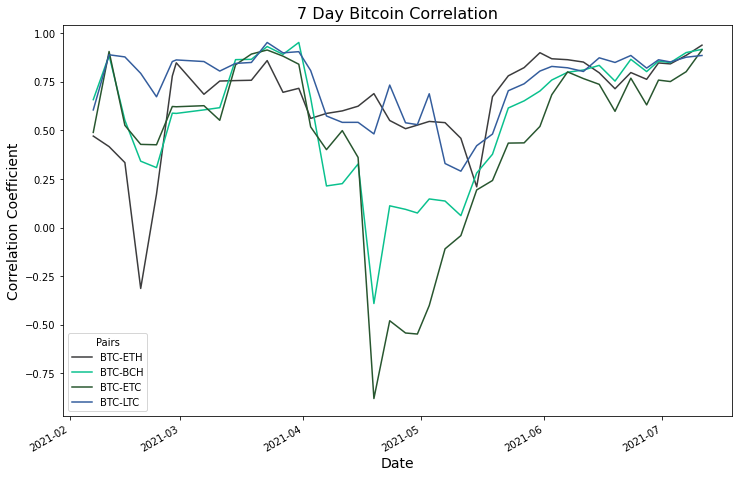

In [8]:
#calculate & plot correlation
period = 7
btc_eth_corrs = btc_returns.rolling(period).corr(other=eth_returns).dropna()
btc_etc_corrs = btc_returns.rolling(period).corr(other=etc_returns).dropna()
btc_bch_corrs = btc_returns.rolling(period).corr(other=bch_returns).dropna()
ltc_btc_corrs = btc_returns.rolling(period).corr(other=ltc_returns).dropna()


btc_eth_corrs.plot(figsize=(12,8), label='BTC-ETH', color='#3c3c3d')
btc_bch_corrs.plot(figsize=(12,8), label='BTC-BCH', color='#0AC18E')
btc_etc_corrs.plot(figsize=(12,8), label='BTC-ETC', color='#28562F')
ltc_btc_corrs.plot(figsize=(12,8), label='BTC-LTC', color='#345D9D')


#add legend
plt.legend(title='Pairs')

#add axes labels and a title
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('7 Day Bitcoin Correlation', fontsize=16)